In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in dataset
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")
rentals.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [3]:
rentals.columns

Index(['Region', 'Condition', 'Rooms', 'Rent', 'Year_Construction', 'Space'], dtype='object')

In [13]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             764 non-null    object 
 1   Condition          764 non-null    object 
 2   Rooms              764 non-null    float64
 3   Rent               764 non-null    float64
 4   Year_Construction  764 non-null    int64  
 5   Space              764 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 35.9+ KB


<Axes: xlabel='Region', ylabel='Count'>

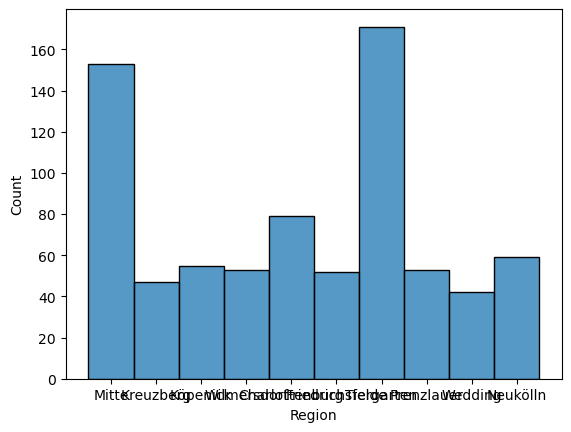

In [7]:
sns.histplot(data=rentals, x="Region", bins=40)

In [9]:
rentals.sort_values(by='Rent', ascending=False).head(10)

,Region,Condition,Rooms,Rent,Year_Construction,Space
694,Mitte,mint_condition,5.0,14207.00,2015,413.91
245,Charlottenburg,no_information,5.0,9774.00,1900,274.00
281,Mitte,first_time_use,5.0,6855.48,2005,286.84
13,Kreuzberg,mint_condition,2.0,6450.00,2016,186.00
653,Mitte,first_time_use,2.0,6022.50,2019,123.00
590,Mitte,refurbished,3.0,5936.40,2018,131.92
591,Mitte,refurbished,3.0,5936.40,2018,131.92
119,Prenzlauer,mint_condition,5.0,5930.00,2005,324.00
675,Wilmersdorf,well_kept,7.0,5876.35,1912,300.00
328,Mitte,first_time_use,4.0,5774.83,2015,242.64


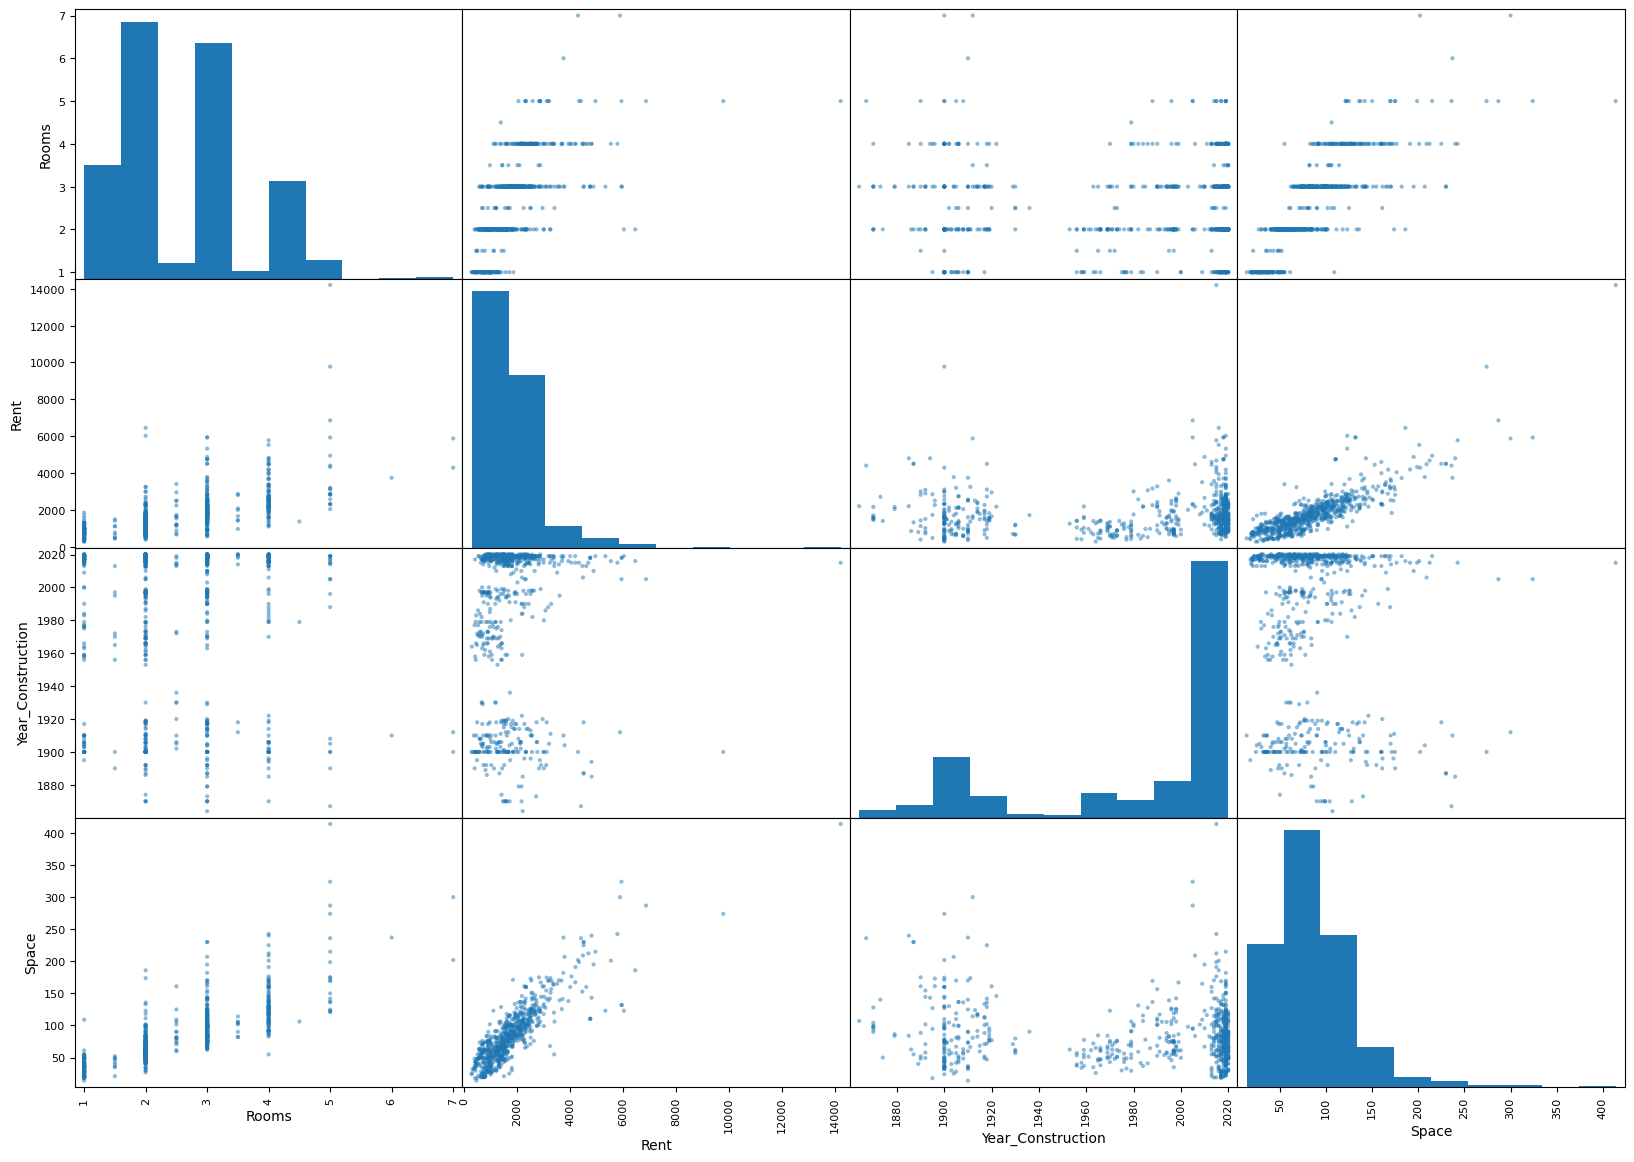

In [11]:
pd.plotting.scatter_matrix(rentals, figsize=(20,14));

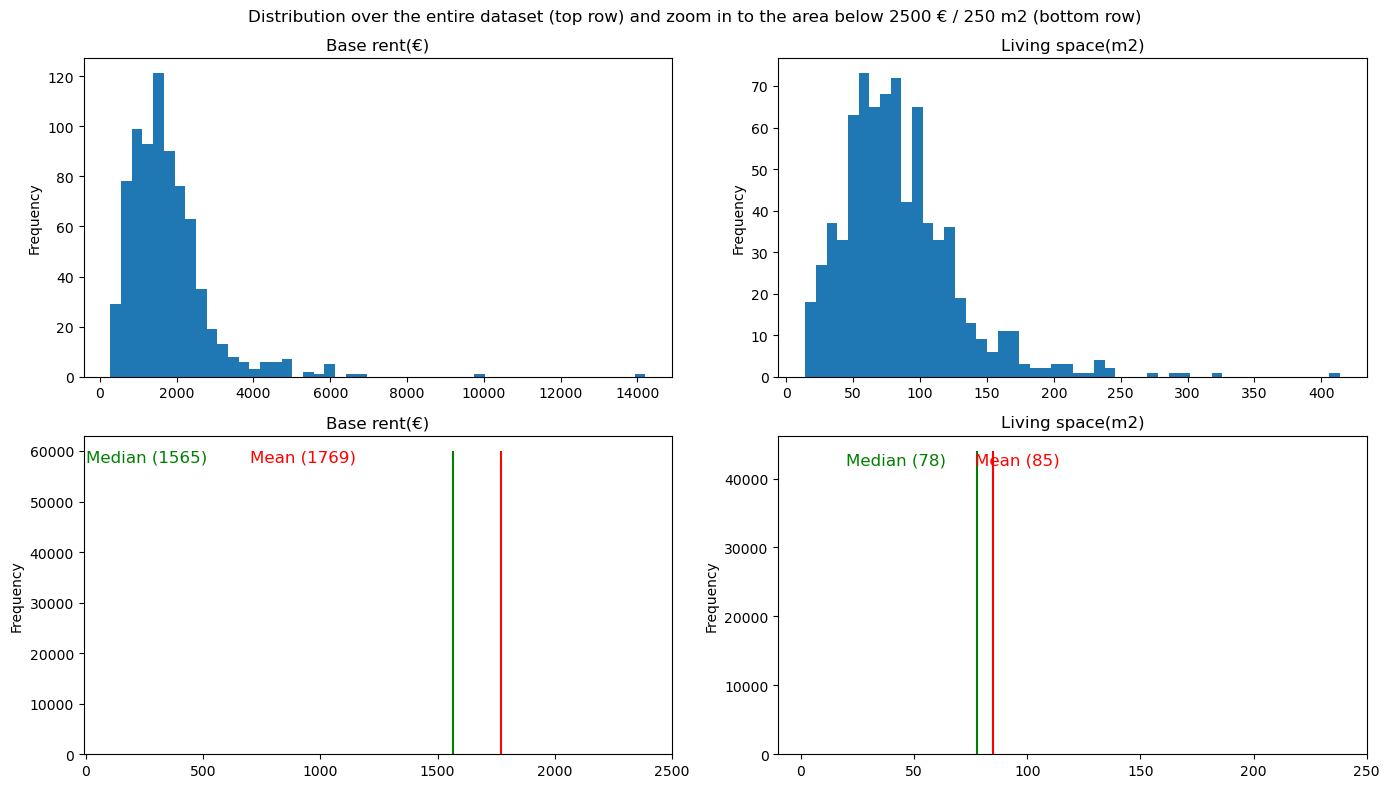

In [13]:
fig, ax = plt.subplots(ncols=2, nrows=2,figsize=(14,8))
columns = ['Rent', 'Space']
titles = ['Base rent(€)', 'Living space(m2)']

for i in range(2):
    rentals.loc[:,columns[i]].plot(kind='hist', ax=ax[0,i], title=titles[i], bins=50)
    if i == 0:
        rentals.loc[:,columns[i]].plot(kind='hist', ax=ax[1,i], title=titles[i], bins=200, xlim=(-10,2500))
        ax[1,i].vlines(x=rentals.loc[:,columns[i]].mean(), ymin=0, ymax=60000, colors='red')
        ax[1,i].vlines(x=rentals.loc[:,columns[i]].median(), ymin=0, ymax=60000, colors='green')
        ax[1,i].text(x=0, y=58000, s='Median ({})'.format(round(rentals.loc[:,columns[i]].median()),0), fontsize=12, color='green')
        ax[1,i].text(x=700, y=58000, s='Mean ({})'.format(round(rentals.loc[:,columns[i]].mean()),0), fontsize=12, color='red')
else:
        rentals.loc[:,columns[i]].plot(kind='hist', ax=ax[1,i], title=titles[i], bins=80, xlim=(-10,250))
        ax[1,i].vlines(x=rentals.loc[:,columns[i]].mean(), ymin=0, ymax=44000, colors='red')
        ax[1,i].vlines(x=rentals.loc[:,columns[i]].median(), ymin=0, ymax=44000, colors='green')
        ax[1,i].text(x=20, y=42000, s='Median ({})'.format(round(rentals.loc[:,columns[i]].median()),0), fontsize=12, color='green')
        ax[1,i].text(x=77, y=42000, s='Mean ({})'.format(round(rentals.loc[:,columns[i]].mean()),0), fontsize=12, color='red')

fig.suptitle('Distribution over the entire dataset (top row) and zoom in to the area below 2500 € / 250 m2 (bottom row)')
fig.tight_layout();

The skewness of dataset is: Rooms                0.487065
Rent                 3.384964
Year_Construction   -1.028900
Space                1.793434
dtype: float64
Mean of dataset is: Rooms                   2.549738
Rent                 1768.560942
Year_Construction    1983.695026
Space                  84.656270
dtype: float64


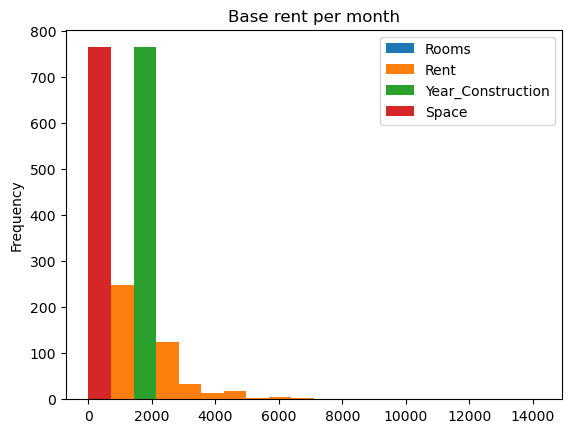

In [15]:
rentals.plot.hist(title='Base rent per month', bins=20)

# Fix: Only select numeric columns
numeric_rentals = rentals.select_dtypes(include='number')

print('The skewness of dataset is:', numeric_rentals.skew())
print('Mean of dataset is:', numeric_rentals.mean())

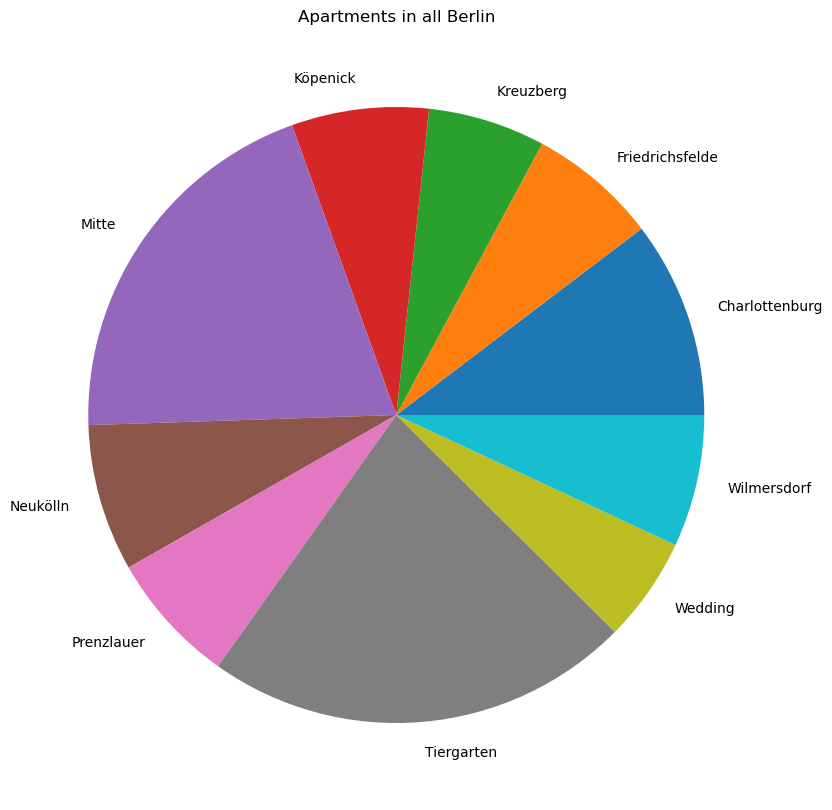

In [27]:
plot = rentals.groupby(by = 'Region').count().plot.pie(y='Condition', figsize=(10,10), legend=False, label ="",labeldistance=1.1,title = 'Apartments in all Berlin')

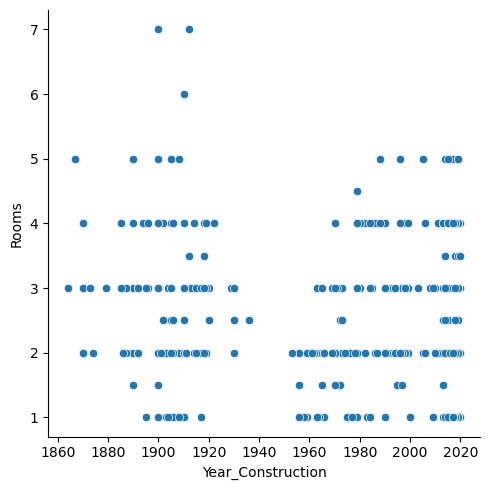

In [17]:
# scatter plot in seaborn
sns.relplot(
    data=rentals,
    x="Year_Construction", y="Rooms"
)

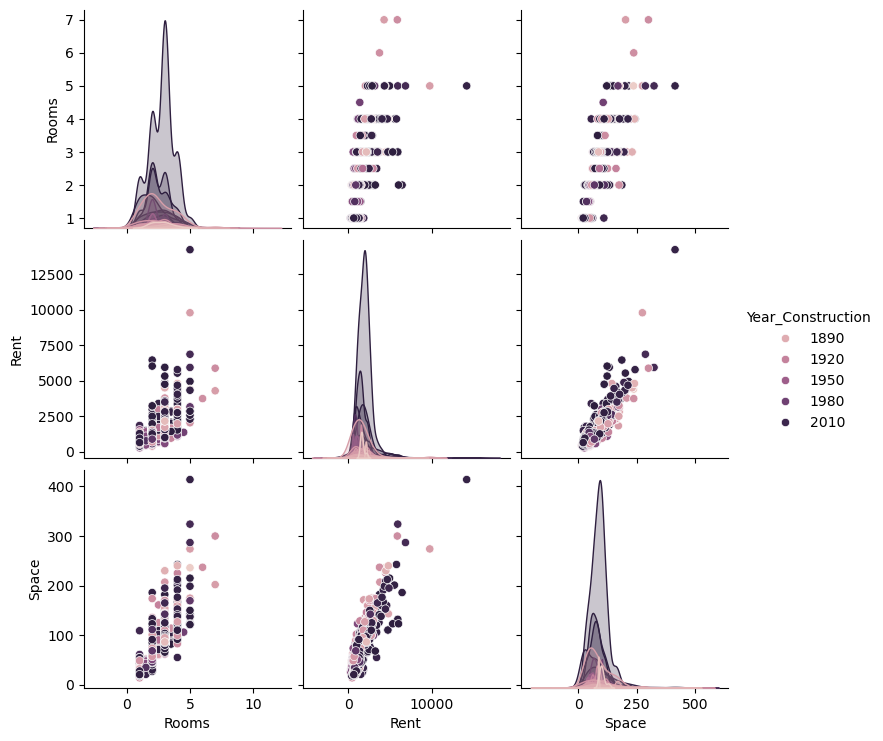

In [32]:
sns.pairplot(rentals, hue='Year_Construction')

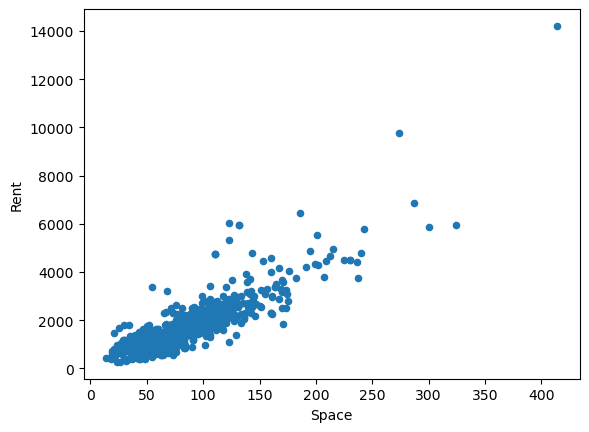

In [19]:
rentals.plot.scatter(x='Space', y='Rent');

<Axes: xlabel='Space,Rent'>

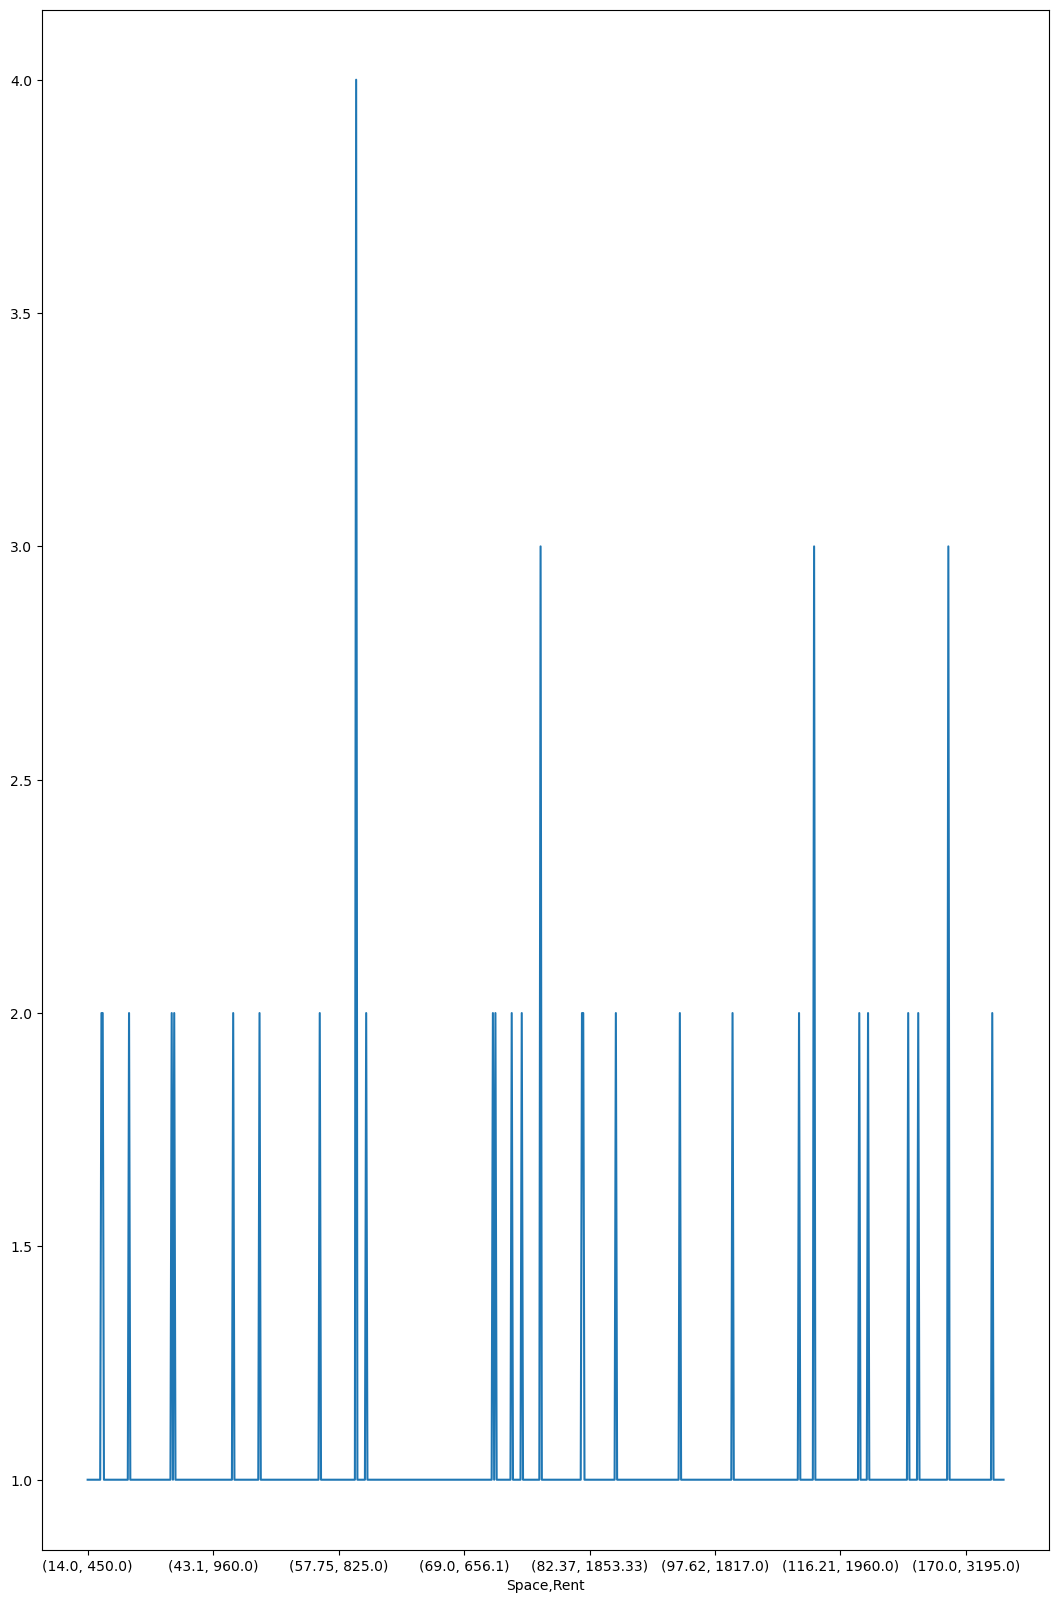

In [21]:
rentals.groupby(['Space', 'Rent']).size().plot(figsize=(13,20))

<Axes: xlabel='Space'>

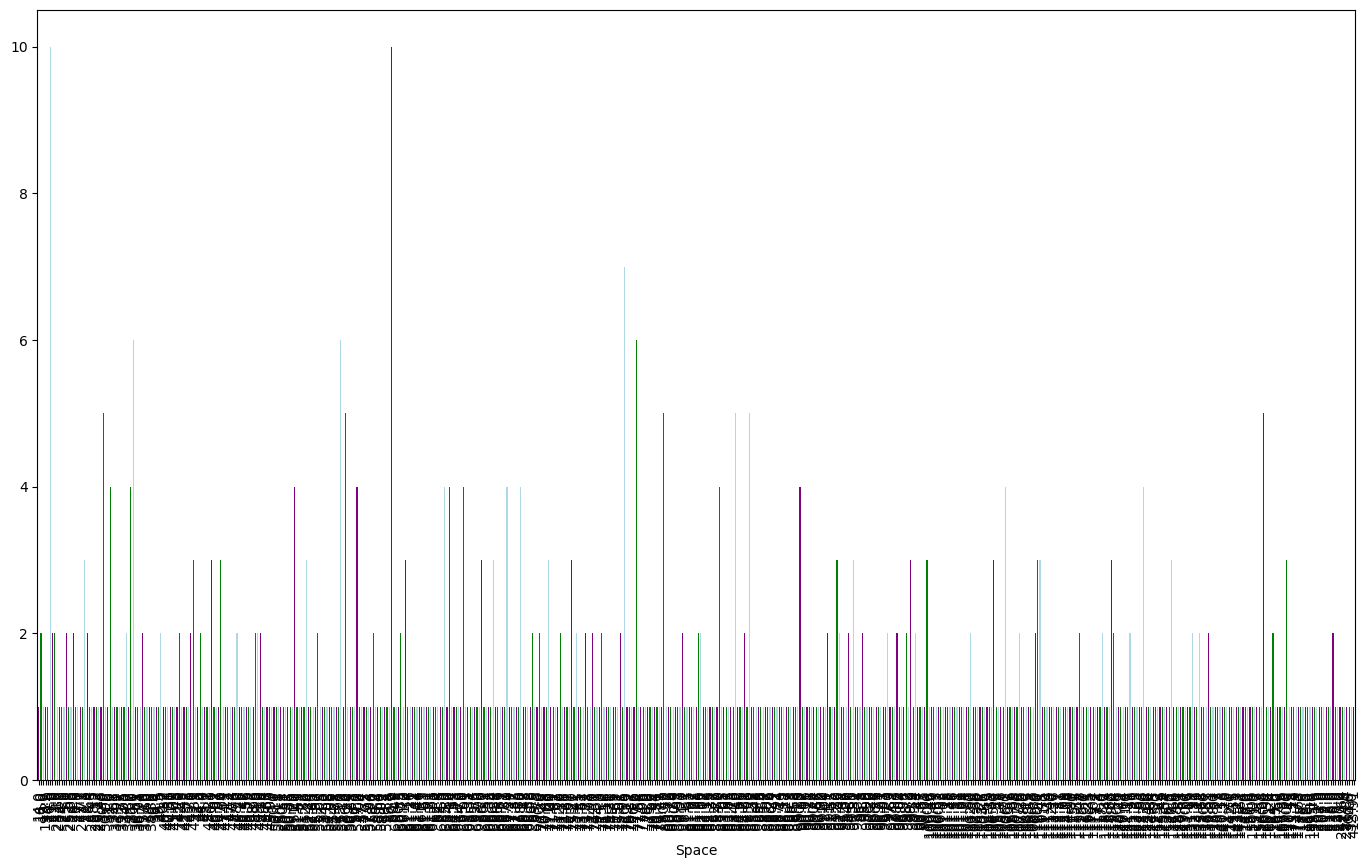

In [23]:
colors = ["purple", "green", "lightblue"]
rentals['Rent'].groupby(by=rentals["Space"]).count().plot(kind="bar",color=colors,figsize = (17,10))

C:\Users\Farhe\AppData\Local\Temp\ipykernel_12504\4146112967.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rentals[rentals.Rooms==room].Space, shade=False, clip=(0,100), label=room)
C:\Users\Farhe\AppData\Local\Temp\ipykernel_12504\4146112967.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rentals[rentals.Rooms==room].Space, shade=False, clip=(0,100), label=room)
C:\Users\Farhe\AppData\Local\Temp\ipykernel_12504\4146112967.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rentals[rentals.Rooms==room].Space, shade=False, clip=(0,100), label=room)
C:\Users\Farhe\AppData\Local\Temp\ipykernel_12504\4146112967.

Text(0.5, 1.0, 'Apartment Price per Room Type')

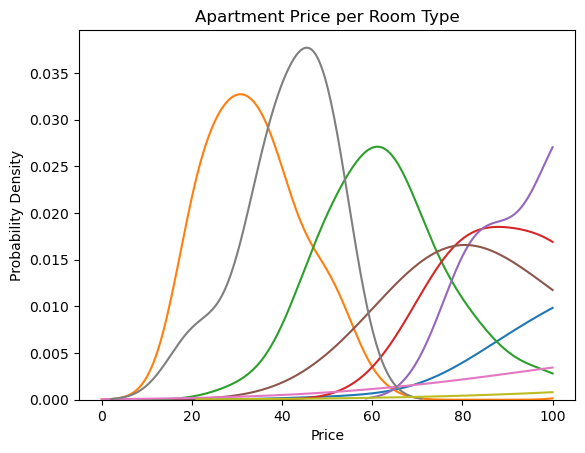

In [25]:
for i, room in enumerate(rentals.Rooms.unique()):
    sns.kdeplot(rentals[rentals.Rooms==room].Space, shade=False, clip=(0,100), label=room)


plt.xlabel('Price')
plt.ylabel('Probability Density') 
plt.title('Apartment Price per Room Type')

In [27]:
print(rentals.describe())

            Rooms          Rent  Year_Construction       Space
count  764.000000    764.000000         764.000000  764.000000
mean     2.549738   1768.560942        1983.695026   84.656270
std      1.010826   1118.263961          48.006060   44.195338
min      1.000000    271.250000        1864.000000   14.000000
25%      2.000000   1039.500000        1959.000000   55.097500
50%      2.500000   1565.480000        2015.000000   77.600000
75%      3.000000   2170.000000        2019.000000  104.450000
max      7.000000  14207.000000        2020.000000  413.910000


In [29]:
print(rentals.columns.tolist())

['Region', 'Condition', 'Rooms', 'Rent', 'Year_Construction', 'Space']


In [31]:
import matplotlib.pyplot as plt

plt.hist(rentals["rent"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Rent (€)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Rent Prices")
plt.show()

KeyError: 'rent'

In [33]:
avg_rent = rentals.groupby("region")["rent"].mean().sort_values()

avg_rent.plot(kind="bar", color="teal")
plt.ylabel("Average Rent (€)")
plt.title("Average Rent by Region")
plt.xticks(rotation=45)
plt.show()

KeyError: 'region'

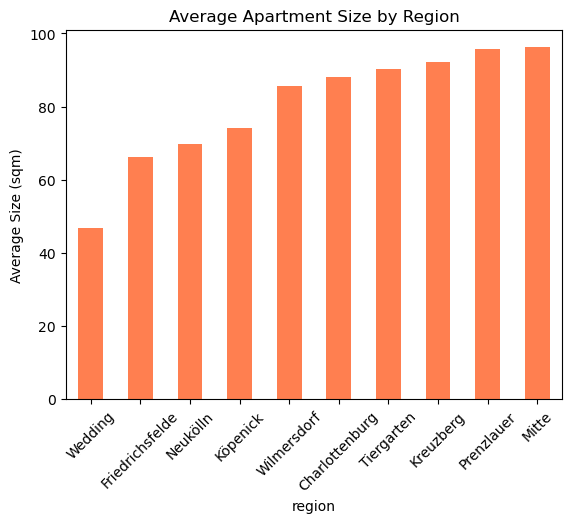

In [43]:
avg_space = rentals.groupby("region")["space"].mean().sort_values()

avg_space.plot(kind="bar", color="coral")
plt.ylabel("Average Size (sqm)")
plt.title("Average Apartment Size by Region")
plt.xticks(rotation=45)
plt.show()


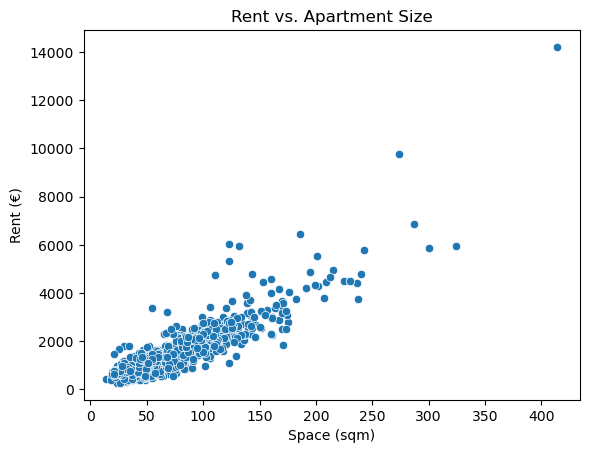

In [45]:
import seaborn as sns

sns.scatterplot(x="space", y="rent", data=rentals)
plt.title("Rent vs. Apartment Size")
plt.xlabel("Space (sqm)")
plt.ylabel("Rent (€)")
plt.show()

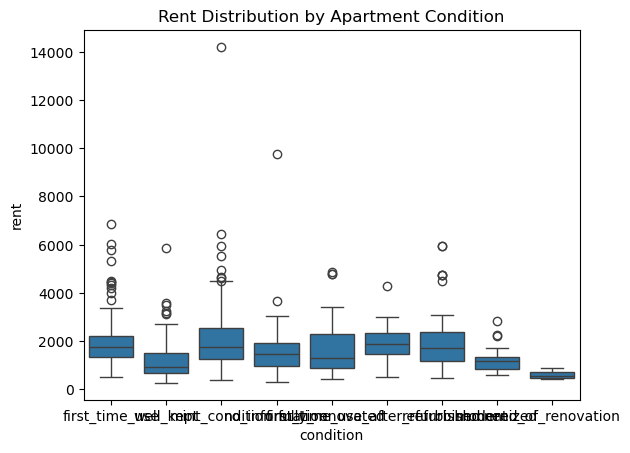

In [47]:
sns.boxplot(x="condition", y="rent", data=rentals)
plt.title("Rent Distribution by Apartment Condition")
plt.show()

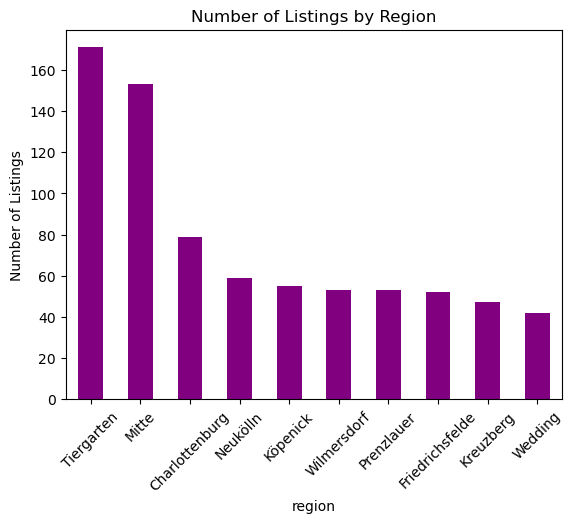

In [49]:
counts = rentals["region"].value_counts()

counts.plot(kind="bar", color="purple")
plt.ylabel("Number of Listings")
plt.title("Number of Listings by Region")
plt.xticks(rotation=45)
plt.show()

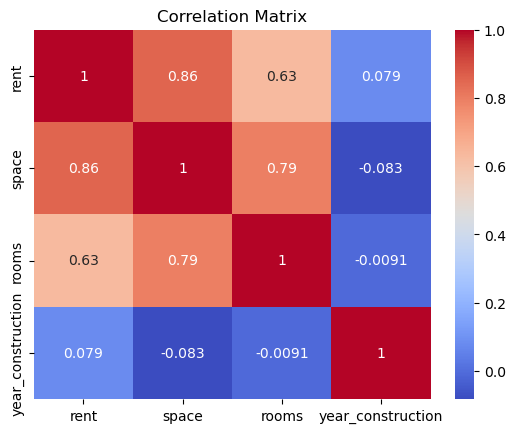

In [51]:
corr = rentals[["rent", "space", "rooms", "year_construction"]].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

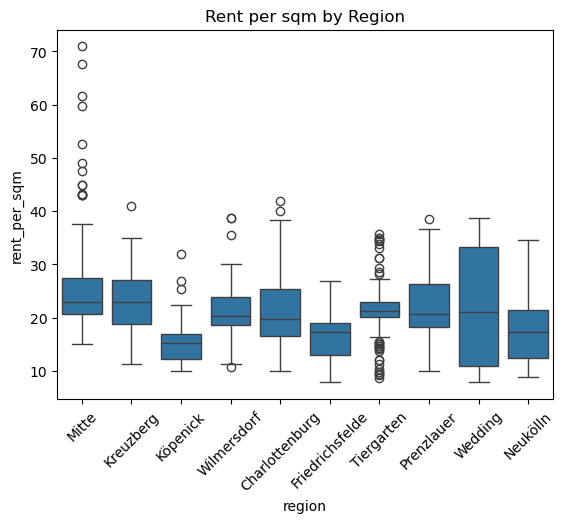

In [53]:
rentals["rent_per_sqm"] = rentals["rent"] / rentals["space"]

sns.boxplot(x="region", y="rent_per_sqm", data=rentals)
plt.xticks(rotation=45)
plt.title("Rent per sqm by Region")
plt.show()

Number of old buildings: 182


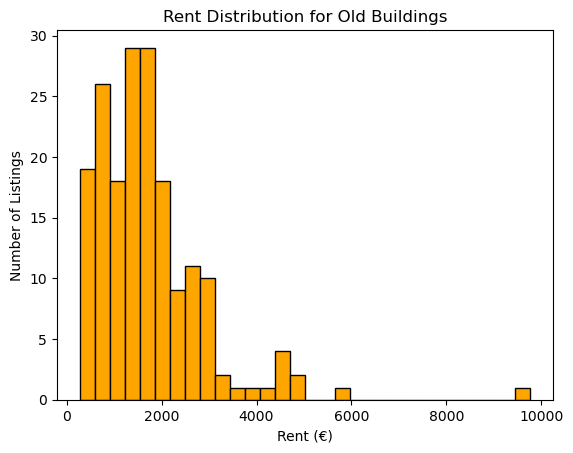

In [55]:
old_buildings = rentals[rentals["year_construction"] < 1950]
print("Number of old buildings:", len(old_buildings))

plt.hist(old_buildings["rent"], bins=30, color='orange', edgecolor='black')
plt.title("Rent Distribution for Old Buildings")
plt.xlabel("Rent (€)")
plt.ylabel("Number of Listings")
plt.show()

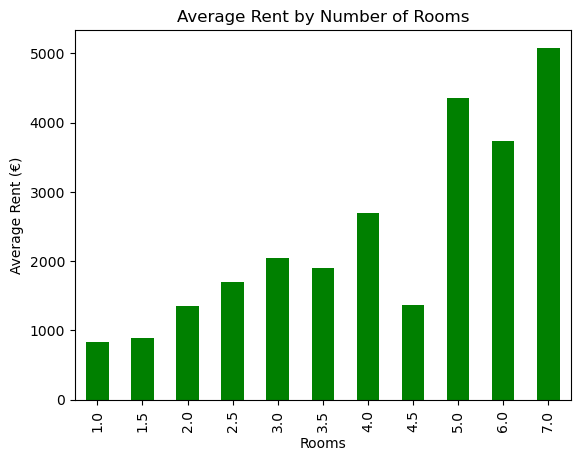

In [57]:
avg_rent_by_rooms = rentals.groupby("rooms")["rent"].mean()

avg_rent_by_rooms.plot(kind="bar", color="green")
plt.title("Average Rent by Number of Rooms")
plt.xlabel("Rooms")
plt.ylabel("Average Rent (€)")
plt.show()


In [59]:
cheap_flats = rentals[rentals["rent"] < 800]
print(cheap_flats.head())


             region       condition  rooms    rent  year_construction  space  \
7    Charlottenburg       well_kept    2.0  730.73               1900  72.61   
8   Friedrichsfelde       well_kept    2.0  561.93               1971  62.40   
26            Mitte  mint_condition    1.0  715.00               2014  19.00   
38          Wedding  no_information    2.5  658.11               1930  60.00   
42       Tiergarten  no_information    1.0  311.04               1900  32.00   

    rent_per_sqm  
7      10.063765  
8       9.005288  
26     37.631579  
38     10.968500  
42      9.720000  


In [61]:
large_flats = rentals[rentals["space"] > 100]
print(large_flats.head())

         region       condition  rooms     rent  year_construction   space  \
0         Mitte  first_time_use    4.0  2659.00               2019  117.20   
3   Wilmersdorf       well_kept    4.0  1830.22               1900  171.18   
10        Mitte  first_time_use    4.0  2499.00               2019  125.20   
13    Kreuzberg  mint_condition    2.0  6450.00               2016  186.00   
21     Köpenick       well_kept    3.0  1589.00               1994  105.47   

    rent_per_sqm  
0      22.687713  
3      10.691786  
10     19.960064  
13     34.677419  
21     15.065896  


In [63]:
avg_rent = rentals.groupby("region")["rent"].mean()
print(avg_rent)

region
Charlottenburg     1753.452532
Friedrichsfelde    1043.871731
Kreuzberg          2049.138085
Köpenick           1125.475818
Mitte              2408.725033
Neukölln           1188.114915
Prenzlauer         1996.962264
Tiergarten         1914.824795
Wedding             847.138571
Wilmersdorf        1748.646226
Name: rent, dtype: float64


In [67]:
rentals["rent_per_sqm"] = rentals["rent"] / rentals["space"]

In [69]:
rentals["building_age"] = 2025 - rentals["year_construction"]

In [73]:
rentals["size_category"] = pd.cut(
    rentals["space"],
    bins=[0, 50, 100, 150, rentals["space"].max()],
    labels=["Small", "Medium", "Large", "Very Large"]
)

In [75]:
rentals["price_category"] = pd.cut(
    rentals["rent"],
    bins=[0, 800, 1500, rentals["rent"].max()],
    labels=["Cheap", "Medium", "Expensive"]
)

In [77]:
avg_rent_condition = rentals.groupby("condition")["rent"].mean()
print(avg_rent_condition)

condition
first_time_use                        1866.564222
first_time_use_after_refurbishment    1925.351944
fully_renovated                       1778.308571
mint_condition                        2122.196154
modernized                            1185.705172
need_of_renovation                     612.290000
no_information                        1544.274955
refurbished                           2177.256500
well_kept                             1217.096979
Name: rent, dtype: float64


In [81]:
counts = rentals.groupby(["region", "condition"]).size().unstack()
print(counts)

condition        first_time_use  first_time_use_after_refurbishment  \
region                                                                
Charlottenburg             27.0                                 7.0   
Friedrichsfelde            25.0                                 NaN   
Kreuzberg                  11.0                                 2.0   
Köpenick                   15.0                                 8.0   
Mitte                      43.0                                 7.0   
Neukölln                   20.0                                 NaN   
Prenzlauer                  4.0                                 3.0   
Tiergarten                101.0                                 1.0   
Wedding                     5.0                                 2.0   
Wilmersdorf                19.0                                 6.0   

condition        fully_renovated  mint_condition  modernized  \
region                                                         
Charlottenburg     

In [83]:
pivot = rentals.pivot_table(
    index="region",
    columns="rooms",
    values="rent",
    aggfunc="mean"
)
print(pivot)

rooms                    1.0          1.5          2.0          2.5  \
region                                                                
Charlottenburg   1080.083333   788.760000  1389.230000  1209.000000   
Friedrichsfelde   593.958000   668.400000   908.838400          NaN   
Kreuzberg         907.182500          NaN  1754.651875  3175.000000   
Köpenick          788.498750          NaN   958.169200  1189.270000   
Mitte            1047.050000  1125.333333  1805.733333  2060.270000   
Neukölln          649.077273   489.070000  1041.799545   796.295000   
Prenzlauer        892.715714          NaN  1470.586842  1938.890000   
Tiergarten        794.130769   433.710000  1350.125000  2500.000000   
Wedding           699.206250          NaN   837.695714   923.795000   
Wilmersdorf       966.487778  1399.920000  1353.853125  1456.643333   

rooms                    3.0       3.5          4.0     4.5          5.0  \
region                                                                 

In [85]:
from scipy.stats import zscore

z_scores = zscore(rentals["rent"])
outliers = rentals[(z_scores > 3) | (z_scores < -3)]
print(outliers)

             region       condition  rooms      rent  year_construction  \
13        Kreuzberg  mint_condition    2.0   6450.00               2016   
61            Mitte  mint_condition    4.0   5530.00               2016   
119      Prenzlauer  mint_condition    5.0   5930.00               2005   
245  Charlottenburg  no_information    5.0   9774.00               1900   
281           Mitte  first_time_use    5.0   6855.48               2005   
328           Mitte  first_time_use    4.0   5774.83               2015   
590           Mitte     refurbished    3.0   5936.40               2018   
591           Mitte     refurbished    3.0   5936.40               2018   
646           Mitte  first_time_use    3.0   5322.50               2019   
653           Mitte  first_time_use    2.0   6022.50               2019   
675     Wilmersdorf       well_kept    7.0   5876.35               1912   
694           Mitte  mint_condition    5.0  14207.00               2015   

      space  rent_per_sq

In [87]:
Q1 = rentals["rent"].quantile(0.25)
Q3 = rentals["rent"].quantile(0.75)
IQR = Q3 - Q1

outliers = rentals[
    (rentals["rent"] < (Q1 - 1.5 * IQR)) |
    (rentals["rent"] > (Q3 + 1.5 * IQR))
]
print(outliers)

             region                           condition  rooms      rent  \
13        Kreuzberg                      mint_condition    2.0   6450.00   
60       Prenzlauer                      first_time_use    4.0   4500.00   
61            Mitte                      mint_condition    4.0   5530.00   
68       Tiergarten                      mint_condition    5.0   4945.00   
76        Kreuzberg                      first_time_use    5.0   4400.00   
101     Wilmersdorf  first_time_use_after_refurbishment    7.0   4288.00   
103      Tiergarten                      mint_condition    3.0   4500.00   
117           Mitte                      mint_condition    4.0   4475.00   
119      Prenzlauer                      mint_condition    5.0   5930.00   
220           Mitte                      mint_condition    4.0   4192.63   
244      Tiergarten                         refurbished    3.0   4500.00   
245  Charlottenburg                      no_information    5.0   9774.00   
268         

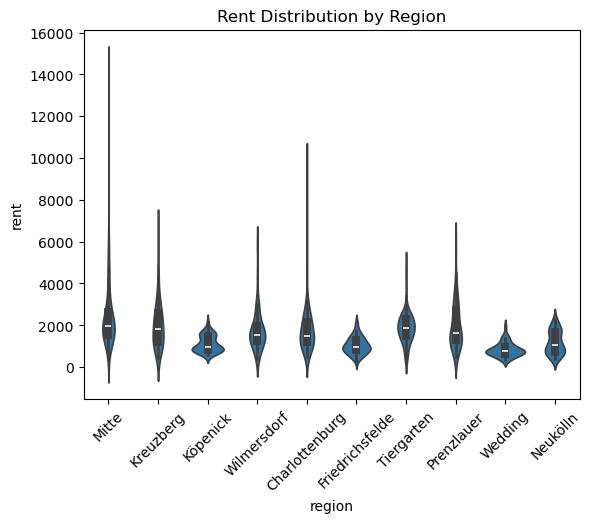

In [89]:
import seaborn as sns

sns.violinplot(x="region", y="rent", data=rentals)
plt.xticks(rotation=45)
plt.title("Rent Distribution by Region")
plt.show()

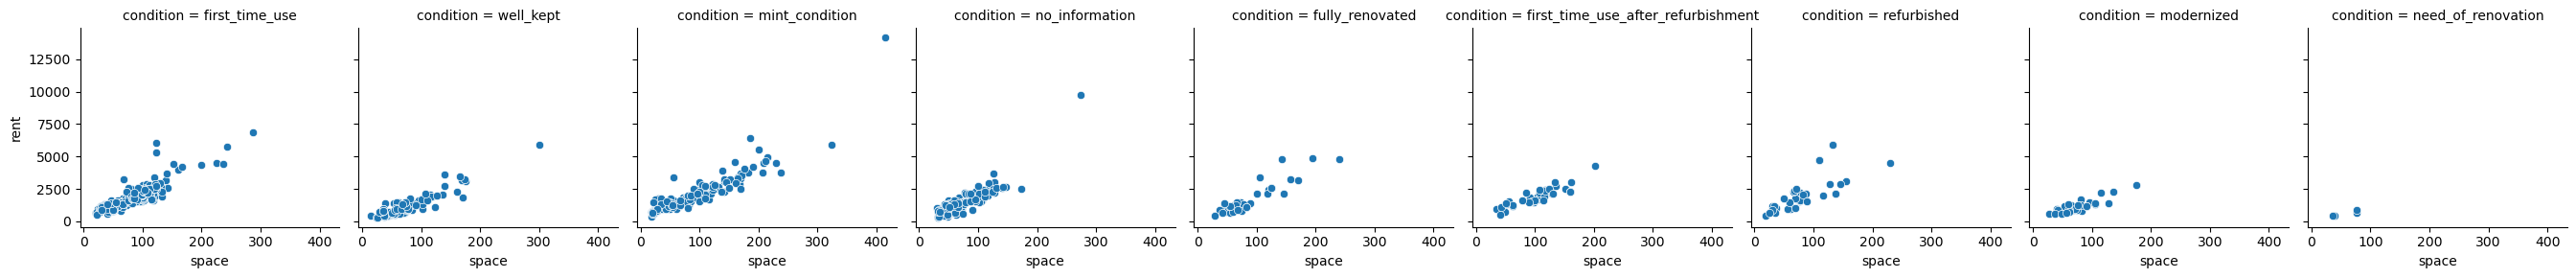

In [91]:
g = sns.FacetGrid(rentals, col="condition")
g.map(sns.scatterplot, "space", "rent")


C:\Users\Farhe\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Farhe\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Farhe\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Farhe\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


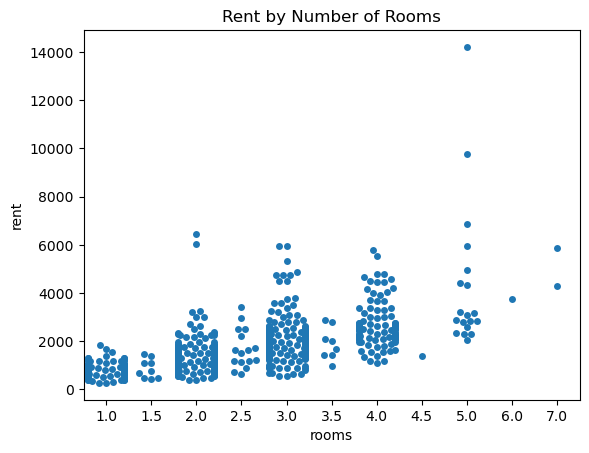

In [93]:
sns.swarmplot(x="rooms", y="rent", data=rentals)
plt.title("Rent by Number of Rooms")
plt.show()

In [95]:
ct = pd.crosstab(rentals["region"], rentals["condition"])
print(ct)

condition        first_time_use  first_time_use_after_refurbishment  \
region                                                                
Charlottenburg               27                                   7   
Friedrichsfelde              25                                   0   
Kreuzberg                    11                                   2   
Köpenick                     15                                   8   
Mitte                        43                                   7   
Neukölln                     20                                   0   
Prenzlauer                    4                                   3   
Tiergarten                  101                                   1   
Wedding                       5                                   2   
Wilmersdorf                  19                                   6   

condition        fully_renovated  mint_condition  modernized  \
region                                                         
Charlottenburg     

In [97]:
print(rentals["rent"].quantile([0.25, 0.5, 0.75]))


0.25    1039.50
0.50    1565.48
0.75    2170.00
Name: rent, dtype: float64


In [99]:
print("Skewness:", rentals["rent"].skew())
print("Kurtosis:", rentals["rent"].kurt())

Skewness: 3.3849637231267584
Kurtosis: 24.970351977055657
